In [1]:
import os
import pickle

from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/clf-data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
input_dir = '/content/clf-data'
categories = ['empty', 'not_empty']

In [5]:
data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        img = resize(img, (15, 15))
        data.append(img.flatten())
        labels.append(category_idx)

data = np.asarray(data)
labels = np.asarray(labels)


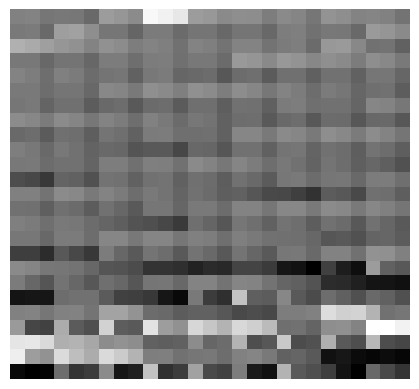

In [6]:
import matplotlib.pyplot as plt

plt.imshow(data[0].reshape(25, 27), cmap='gray')
plt.axis('off')
plt.show()


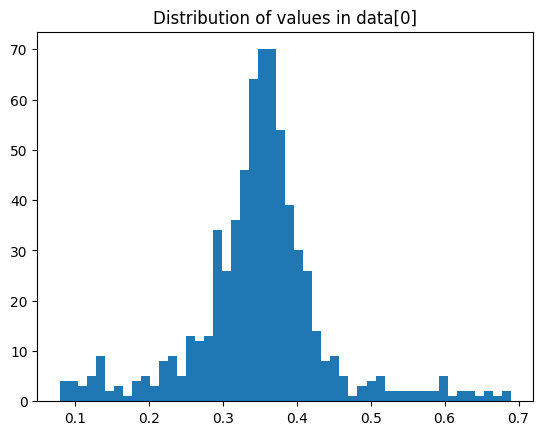

In [7]:
import matplotlib.pyplot as plt

plt.hist(data[0], bins=50)
plt.title("Distribution of values in data[0]")
plt.show()


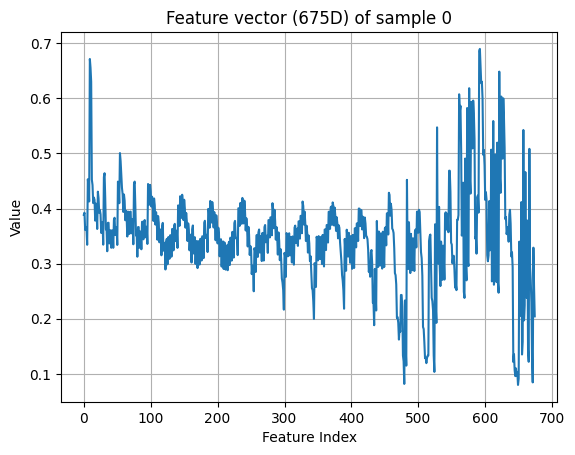

In [8]:
import matplotlib.pyplot as plt

plt.plot(data[0])
plt.title("Feature vector (675D) of sample 0")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()


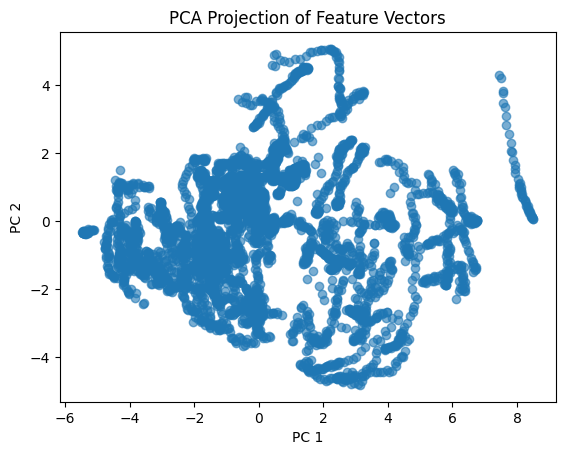

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

plt.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.6)
plt.title("PCA Projection of Feature Vectors")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


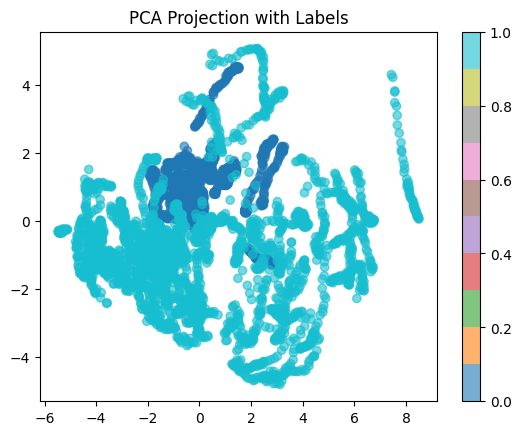

In [10]:
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='tab10', alpha=0.6)
plt.colorbar()
plt.title("PCA Projection with Labels")
plt.show()


In [11]:
data.shape

(6090, 675)

In [12]:
import pandas as pd

pd.Series(labels).value_counts()


,count
0,3045
1,3045


In [15]:
# train / test split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

# train classifier
classifier = SVC(verbose=True)

parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000],'kernel':['linear', 'poly', 'rbf', 'sigmoid']} ]

grid_search = GridSearchCV(classifier, parameters, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)


grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[LibSVM]

GridSearchCV(cv=5, estimator=SVC(verbose=True), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             scoring='accuracy', verbose=2)

In [16]:
# test performance
best_estimator = grid_search.best_estimator_

y_prediction = best_estimator.predict(x_test)

score = accuracy_score(y_prediction, y_test)

print('{}% of samples were correctly classified'.format(str(score * 100)))


99.91789819376025% of samples were correctly classified


In [17]:
y_prediction = best_estimator.predict(x_train)

score = accuracy_score(y_prediction, y_train)

print('{}% of samples were correctly classified'.format(str(score * 100)))

100.0% of samples were correctly classified


In [18]:
grid_search.best_estimator_

SVC(C=10, gamma=0.01, verbose=True)

In [19]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [20]:
grid_search.best_score_

np.float64(1.0)

In [ ]:
pickle.dump(best_estimator, open('./model.p', 'wb'))